# Emotion Detection Project:

**AIM**: the aim of the project is to classify or detect peopl's emotions from images dataset from KAGGLE

**DATASET LINK**: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer/data

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image


# Loading the image dataset:

In [2]:
dataset_dir = r"C:\Users\dinaa\Downloads\archive"

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [3]:
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

In [4]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Image Dataset Visualization:

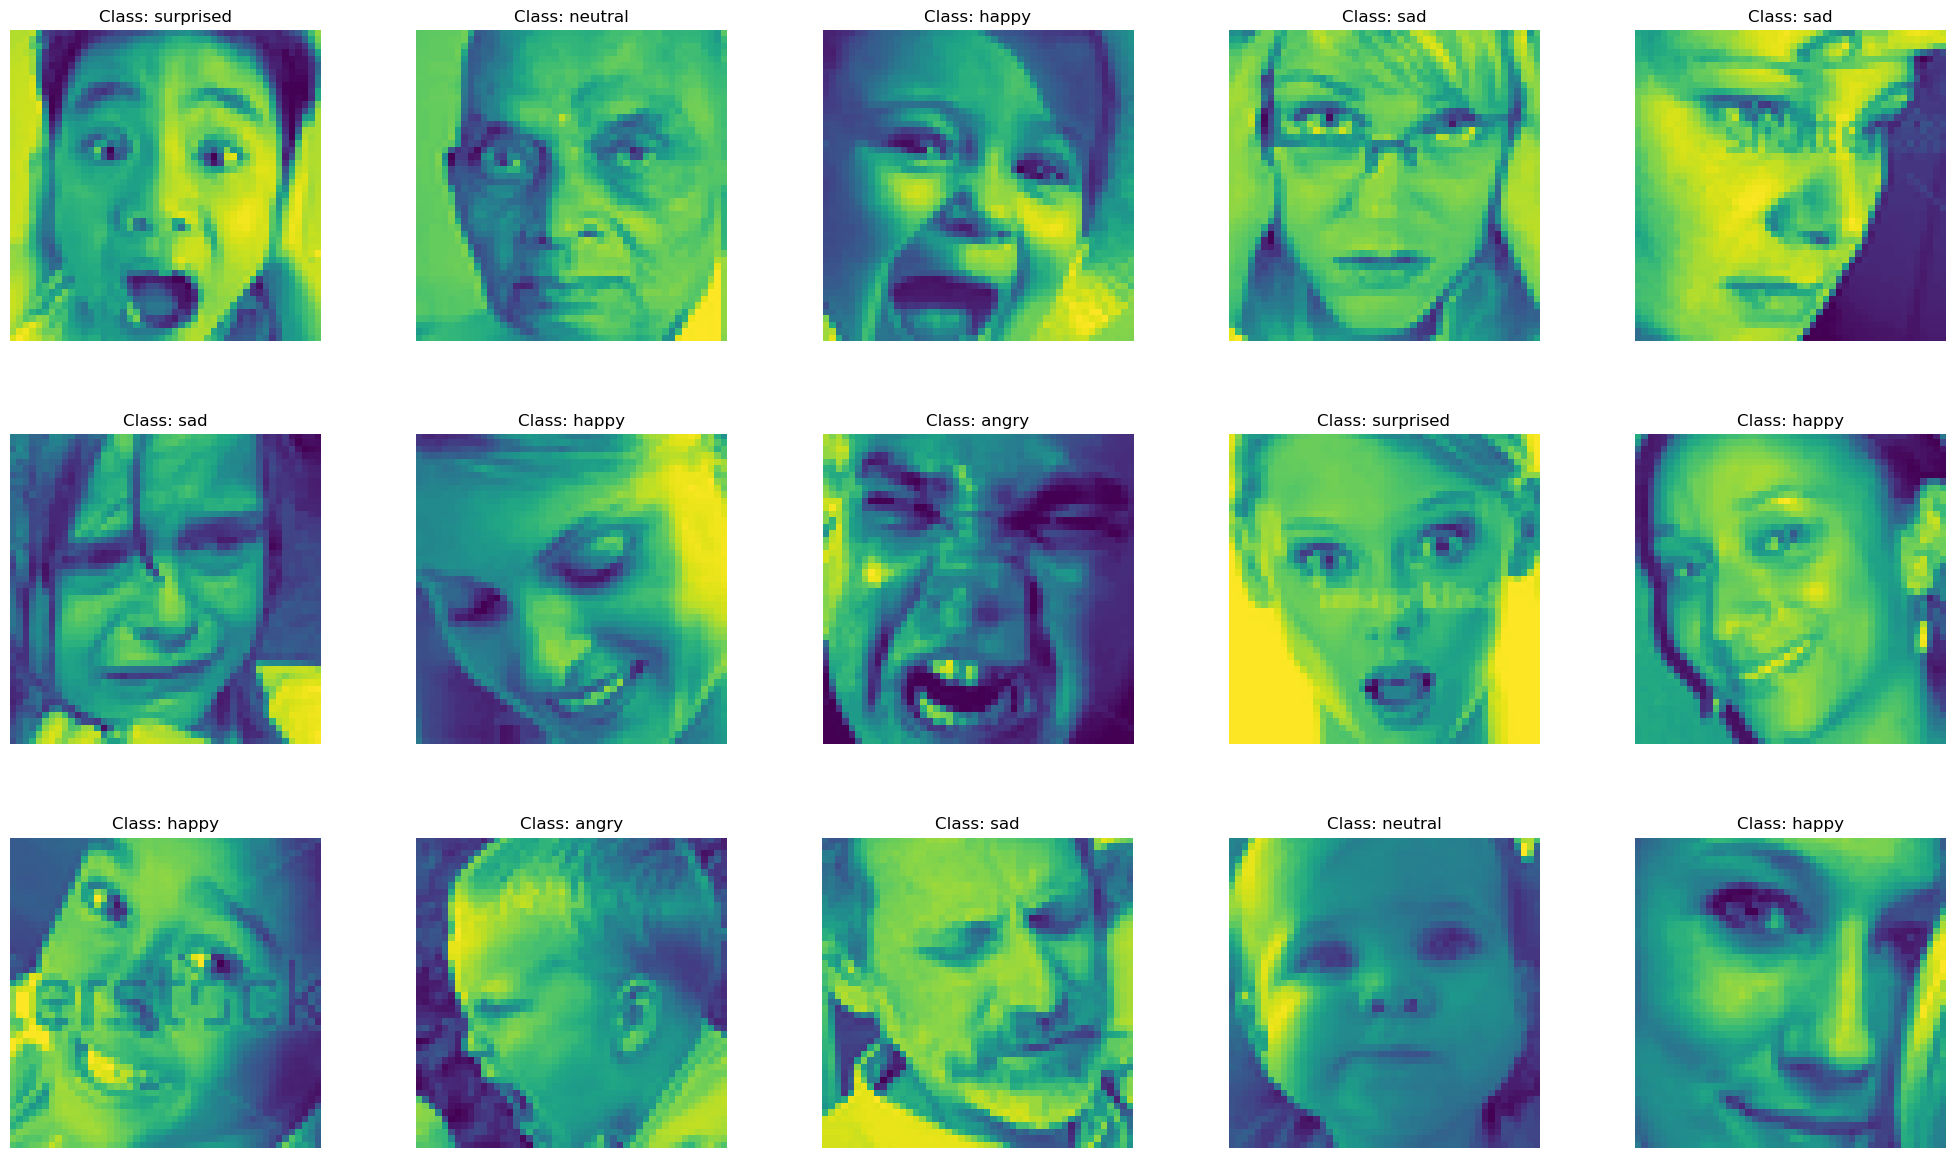

In [13]:
labels = [k for k in train_generator.class_indices]

# Retrieve the next batch of samples
sample_generate = next(train_generator)

images = sample_generate[0]
titles = sample_generate[1]

plt.figure(figsize=(25, 25))

for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i], axis=0)]}')
    plt.axis("off")

plt.show()

# Buliding The Model:

**CNN & Pooling & ANN Layers:**

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

**Applying Early-Stopping and ModelCheckPoints:**

In [6]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./emotion_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

**Model Compilation:**

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Fit the Model:**

In [8]:
history= model.fit(train_generator, epochs=30,batch_size=128,  validation_data=test_generator, callbacks=callbacks_list)

Epoch 1/30
449/449 [==============================] - 185s 408ms/step - loss: 1.6041 - accuracy: 0.3659 - val_loss: 1.3687 - val_accuracy: 0.4801 - lr: 0.0010
Epoch 2/30
449/449 [==============================] - 183s 409ms/step - loss: 1.3204 - accuracy: 0.4967 - val_loss: 1.2458 - val_accuracy: 0.5241 - lr: 0.0010
Epoch 3/30
449/449 [==============================] - 185s 412ms/step - loss: 1.1833 - accuracy: 0.5536 - val_loss: 1.1772 - val_accuracy: 0.5475 - lr: 0.0010
Epoch 4/30
449/449 [==============================] - 181s 404ms/step - loss: 1.0653 - accuracy: 0.6027 - val_loss: 1.1532 - val_accuracy: 0.5553 - lr: 0.0010
Epoch 5/30
449/449 [==============================] - 182s 406ms/step - loss: 0.9545 - accuracy: 0.6444 - val_loss: 1.1523 - val_accuracy: 0.5646 - lr: 0.0010
Epoch 6/30
449/449 [==============================] - 182s 406ms/step - loss: 0.8474 - accuracy: 0.6837 - val_loss: 1.1794 - val_accuracy: 0.5752 - lr: 0.0010
Epoch 7/30
449/449 [==========================

**Visualizing the Accuracy:**

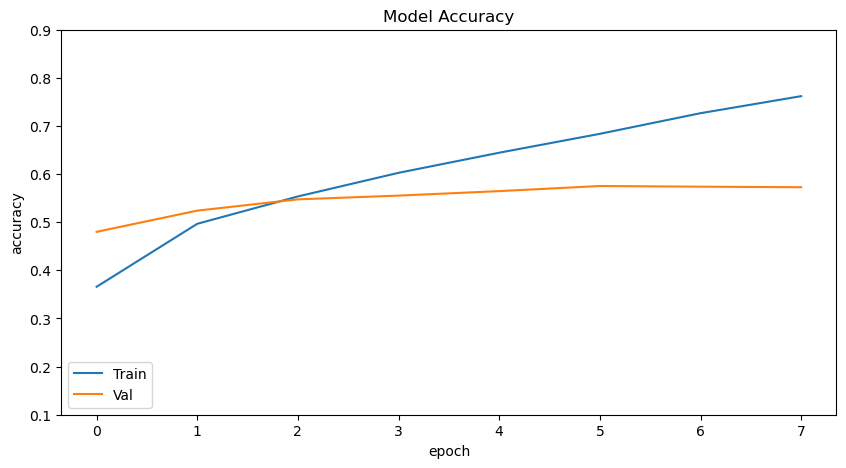

In [11]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='lower left')
plt.ylim(0.1, 0.9)
plt.show()

# Testing the Model:

In [10]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

113/113 [==============================] - 11s 94ms/step - loss: 1.1523 - accuracy: 0.5646
Test Loss: 1.1523
Test Accuracy: 0.5646


# Saving the Model:

In [12]:
model.save('emotion_model.h5')

C:\Users\dinaa\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
